## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.127822 -0.430796 -1.085149  1.301479 -0.689978  0.914897
1  0.650153  0.132779 -1.524505 -1.361469 -1.437462 -0.178884
2 -0.073990 -0.099742 -1.647952  0.922546 -0.966452  1.403316
3  0.914789  0.897864  0.375000 -1.618561  1.617013 -0.027058
4 -1.011851  0.933419 -0.596697 -1.281463  0.420830 -1.378592


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9875550	total: 66.3ms	remaining: 1m 6s
1:	learn: 0.9770231	total: 66.9ms	remaining: 33.4s
2:	learn: 0.9680060	total: 67.4ms	remaining: 22.4s
3:	learn: 0.9596898	total: 68ms	remaining: 16.9s
4:	learn: 0.9527283	total: 68.7ms	remaining: 13.7s
5:	learn: 0.9447471	total: 69.2ms	remaining: 11.5s
6:	learn: 0.9366934	total: 69.7ms	remaining: 9.88s
7:	learn: 0.9277487	total: 70.3ms	remaining: 8.71s
8:	learn: 0.9212198	total: 70.8ms	remaining: 7.79s
9:	learn: 0.9136781	total: 71.3ms	remaining: 7.06s
10:	learn: 0.9060759	total: 71.9ms	remaining: 6.47s
11:	learn: 0.8977690	total: 72.4ms	remaining: 5.96s
12:	learn: 0.8897468	total: 72.9ms	remaining: 5.54s
13:	learn: 0.8817943	total: 73.4ms	remaining: 5.17s
14:	learn: 0.8748481	total: 73.9ms	remaining: 4.85s
15:	learn: 0.8677241	total: 74.4ms	remaining: 4.58s
16:	learn: 0.8620752	total: 74.9ms	remaining: 4.33s
17:	learn: 0.8544431	total: 75.4ms	remaining: 4.12s
18:	learn: 0.8479187	total: 75.8ms	remaining: 

92:	learn: 0.4948554	total: 109ms	remaining: 1.06s
93:	learn: 0.4911681	total: 110ms	remaining: 1.05s
94:	learn: 0.4875729	total: 110ms	remaining: 1.05s
95:	learn: 0.4842304	total: 111ms	remaining: 1.04s
96:	learn: 0.4810427	total: 111ms	remaining: 1.03s
97:	learn: 0.4776489	total: 111ms	remaining: 1.02s
98:	learn: 0.4741261	total: 112ms	remaining: 1.02s
99:	learn: 0.4710883	total: 112ms	remaining: 1.01s
100:	learn: 0.4681975	total: 113ms	remaining: 1s
101:	learn: 0.4646392	total: 113ms	remaining: 998ms
102:	learn: 0.4620630	total: 114ms	remaining: 990ms
103:	learn: 0.4583578	total: 114ms	remaining: 984ms
104:	learn: 0.4560908	total: 115ms	remaining: 977ms
105:	learn: 0.4530009	total: 115ms	remaining: 971ms
106:	learn: 0.4506096	total: 115ms	remaining: 964ms
107:	learn: 0.4481415	total: 116ms	remaining: 956ms
108:	learn: 0.4452916	total: 116ms	remaining: 950ms
109:	learn: 0.4428726	total: 117ms	remaining: 944ms
110:	learn: 0.4396505	total: 117ms	remaining: 937ms
111:	learn: 0.4363470	t

264:	learn: 0.2022613	total: 187ms	remaining: 519ms
265:	learn: 0.2017773	total: 188ms	remaining: 518ms
266:	learn: 0.2002907	total: 188ms	remaining: 516ms
267:	learn: 0.1990151	total: 189ms	remaining: 515ms
268:	learn: 0.1982660	total: 189ms	remaining: 513ms
269:	learn: 0.1979804	total: 189ms	remaining: 512ms
270:	learn: 0.1963351	total: 190ms	remaining: 510ms
271:	learn: 0.1951166	total: 190ms	remaining: 509ms
272:	learn: 0.1944174	total: 191ms	remaining: 507ms
273:	learn: 0.1928038	total: 191ms	remaining: 506ms
274:	learn: 0.1923102	total: 191ms	remaining: 505ms
275:	learn: 0.1917009	total: 192ms	remaining: 503ms
276:	learn: 0.1902592	total: 192ms	remaining: 502ms
277:	learn: 0.1887303	total: 193ms	remaining: 501ms
278:	learn: 0.1884367	total: 193ms	remaining: 499ms
279:	learn: 0.1880660	total: 194ms	remaining: 498ms
280:	learn: 0.1867250	total: 194ms	remaining: 497ms
281:	learn: 0.1864677	total: 195ms	remaining: 496ms
282:	learn: 0.1862292	total: 195ms	remaining: 494ms
283:	learn: 

492:	learn: 0.0636496	total: 292ms	remaining: 301ms
493:	learn: 0.0632679	total: 293ms	remaining: 300ms
494:	learn: 0.0629733	total: 293ms	remaining: 299ms
495:	learn: 0.0627503	total: 294ms	remaining: 298ms
496:	learn: 0.0623651	total: 294ms	remaining: 298ms
497:	learn: 0.0621470	total: 294ms	remaining: 297ms
498:	learn: 0.0619800	total: 295ms	remaining: 296ms
499:	learn: 0.0618158	total: 295ms	remaining: 295ms
500:	learn: 0.0614534	total: 296ms	remaining: 295ms
501:	learn: 0.0611712	total: 296ms	remaining: 294ms
502:	learn: 0.0607952	total: 297ms	remaining: 293ms
503:	learn: 0.0604606	total: 297ms	remaining: 292ms
504:	learn: 0.0603022	total: 298ms	remaining: 292ms
505:	learn: 0.0598520	total: 298ms	remaining: 291ms
506:	learn: 0.0595267	total: 298ms	remaining: 290ms
507:	learn: 0.0593723	total: 299ms	remaining: 289ms
508:	learn: 0.0590137	total: 299ms	remaining: 289ms
509:	learn: 0.0588783	total: 300ms	remaining: 288ms
510:	learn: 0.0585611	total: 300ms	remaining: 287ms
511:	learn: 

654:	learn: 0.0297668	total: 372ms	remaining: 196ms
655:	learn: 0.0296003	total: 372ms	remaining: 195ms
656:	learn: 0.0294260	total: 373ms	remaining: 195ms
657:	learn: 0.0293107	total: 373ms	remaining: 194ms
658:	learn: 0.0291407	total: 374ms	remaining: 193ms
659:	learn: 0.0289888	total: 374ms	remaining: 193ms
660:	learn: 0.0288372	total: 375ms	remaining: 192ms
661:	learn: 0.0287183	total: 375ms	remaining: 192ms
662:	learn: 0.0286211	total: 376ms	remaining: 191ms
663:	learn: 0.0284609	total: 376ms	remaining: 190ms
664:	learn: 0.0283204	total: 377ms	remaining: 190ms
665:	learn: 0.0281827	total: 377ms	remaining: 189ms
666:	learn: 0.0280479	total: 378ms	remaining: 189ms
667:	learn: 0.0279176	total: 378ms	remaining: 188ms
668:	learn: 0.0278304	total: 378ms	remaining: 187ms
669:	learn: 0.0277449	total: 379ms	remaining: 187ms
670:	learn: 0.0276399	total: 379ms	remaining: 186ms
671:	learn: 0.0275281	total: 380ms	remaining: 185ms
672:	learn: 0.0274381	total: 380ms	remaining: 185ms
673:	learn: 

872:	learn: 0.0130203	total: 476ms	remaining: 69.3ms
873:	learn: 0.0129664	total: 477ms	remaining: 68.8ms
874:	learn: 0.0129164	total: 477ms	remaining: 68.2ms
875:	learn: 0.0128653	total: 478ms	remaining: 67.6ms
876:	learn: 0.0128129	total: 478ms	remaining: 67.1ms
877:	learn: 0.0127333	total: 479ms	remaining: 66.5ms
878:	learn: 0.0126834	total: 479ms	remaining: 66ms
879:	learn: 0.0126252	total: 480ms	remaining: 65.4ms
880:	learn: 0.0125741	total: 480ms	remaining: 64.8ms
881:	learn: 0.0125041	total: 480ms	remaining: 64.3ms
882:	learn: 0.0124502	total: 481ms	remaining: 63.7ms
883:	learn: 0.0124003	total: 481ms	remaining: 63.2ms
884:	learn: 0.0123529	total: 482ms	remaining: 62.6ms
885:	learn: 0.0122844	total: 482ms	remaining: 62.1ms
886:	learn: 0.0122408	total: 483ms	remaining: 61.5ms
887:	learn: 0.0121925	total: 483ms	remaining: 61ms
888:	learn: 0.0121374	total: 484ms	remaining: 60.4ms
889:	learn: 0.0120916	total: 484ms	remaining: 59.9ms
890:	learn: 0.0120379	total: 485ms	remaining: 59.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

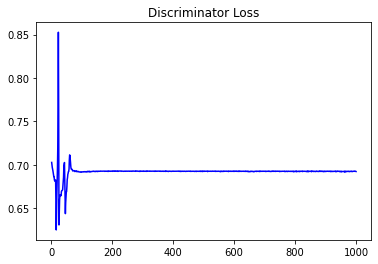

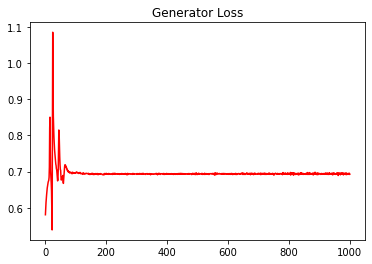

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08857267995337215


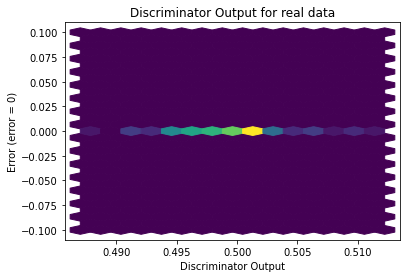

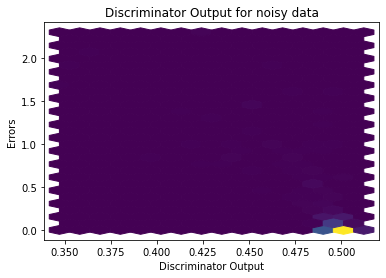

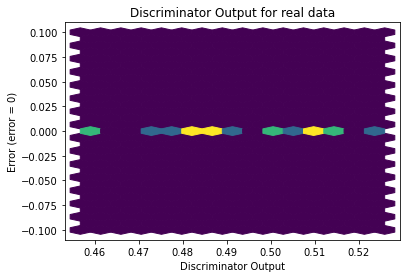

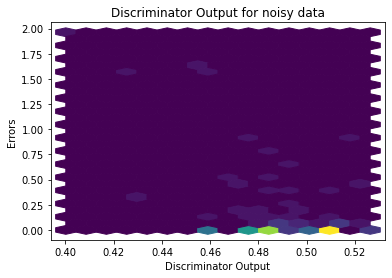

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


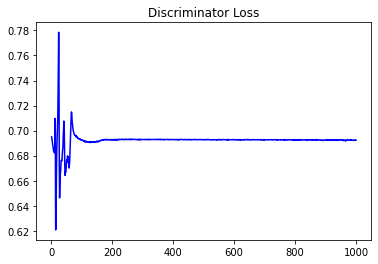

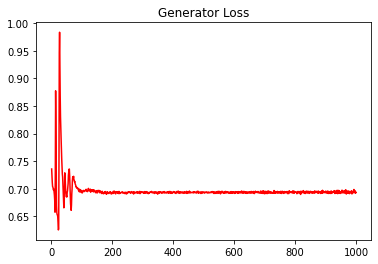

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17322918635918783


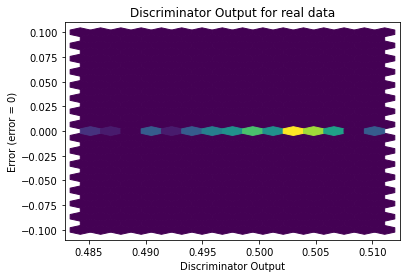

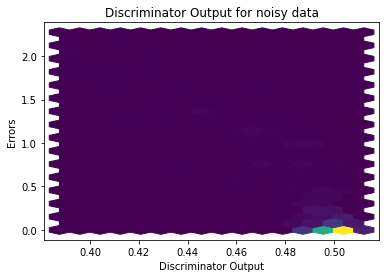

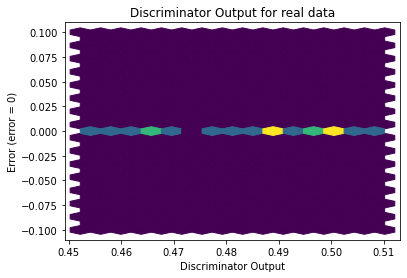

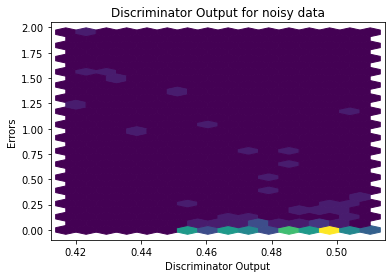

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8150]], requires_grad=True)
